In [36]:
from mylatex import *
import pyperclip
from PIL import Image

In [14]:
import sympy as sy
simplify = lambda expr:sy.factor(sy.simplify(sy.expand(expr)))
q = sy.symbols('q')

In [2]:
def gtm(t,m,q):
    '''(x_{-i}x_i)^m 展开的系数'''
    #assert t>0 and m>0, '下标必须为正'
    res = 0
    fac = q**(t**2-2*t+m) # 补乘因子
    for j in range(1,t+1):
        numer = (q**(2*j)-1)**(m-1)
        denomin = 1
        for k in range(1,t+1):
            if k==j:continue
            denomin *= (q**(2*j)-q**(2*k))
        res += numer/denomin
    return res*fac

In [23]:
def tidy(l,c=0):
    '''将二维列表元素长度整齐化，用c补齐'''
    n = max([len(i) for i in l])
    return [[(line[i] if i<len(line) else c) for i in range(n)] for line in l]

In [7]:
res = []
for m in range(2,9):
    print(m,end='\t')
    res.append([])
    for t in range(1,m):
        res[-1].append(simplify(gtm(t,m,q)))

string = str(res)
var('q')
exec('res2='+string)
table(res2)

2	3	4	5	6	7	8	

(q + 1)*(q - 1)*q
  (q + 1)^2*(q - 1)^2*q^2
  (q + 1)^3*(q - 1)^3*q^3
  (q + 1)^4*(q - 1)^4*q^4
  (q + 1)^5*(q - 1)^5*q^5
  (q + 1)^6*(q - 1)^6*q^6
  (q + 1)^7*(q - 1)^7*q^7

In [33]:
mat = Matrix(tidy(res2))
pyperclip.copy('$'+latex(mat)+'$')
latex2png('$'+latex(mat)+'$',density=200)
Image.open('rex.png')

True

In [58]:
res3 = []
fac = q*q-1
for i,line in enumerate(mat):
    res3.append([])
    for j,expr in enumerate(line):
        if expr: # 非零情形
            expr /= fac**(i-j+1)
            expr /= q**(j*j+i+1)
            expr = sy.expand(simplify(expr))
        res3[-1].append(expr)

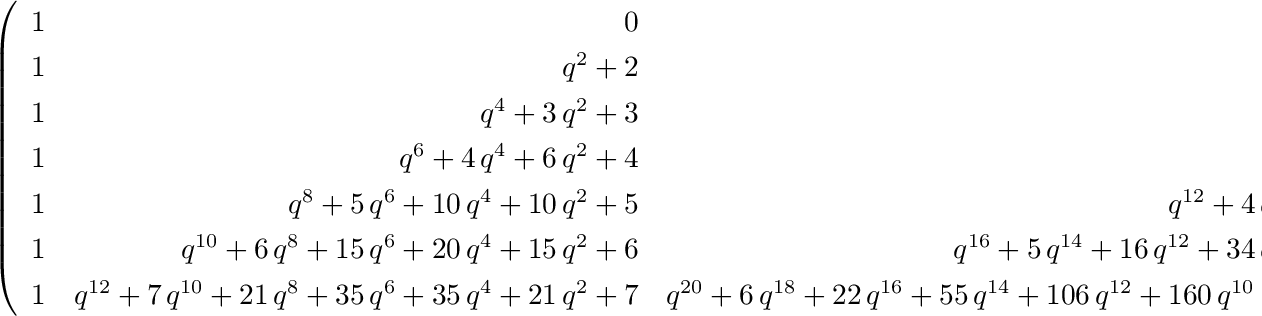

In [60]:
#sy.Matrix(res3)
mat = Matrix(tidy(res3))
pyperclip.copy('$'+latex(mat)+'$')